In [18]:
from PIL import Image ,  ImageOps
from tensorflow.keras.models import load_model
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import script_test as sr

In [19]:
def Iou_img(path , i , test_data):
    model = load_model(path)
    model = model.predict(test_data)
    model = np.round(model)
    x = np.array(model[0].reshape(512,512,3) *255).astype('uint8')
    img = Image.fromarray(x)
    #img.show()
    #이미지 저장.
    img.save(f"./testtarget/{i}.jpg")
    #plt.imshow(img)
    print(f"{i}저장")
    return model

In [20]:
HEIGHT, WIDTH, CHANNEL = 512, 512, 3

X_test = sr.imagePrep('data/test/*.png', WIDTH, HEIGHT, CHANNEL)

print(X_test.shape, X_test.dtype)

(1, 512, 512, 3) float32


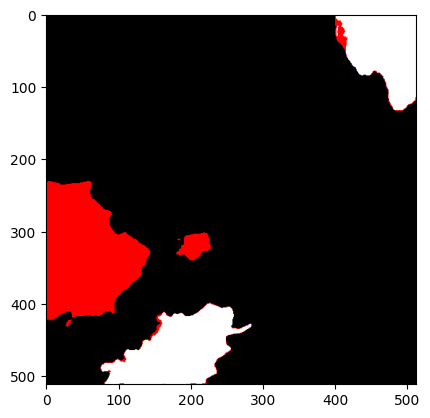

In [21]:
tf.debugging.set_log_device_placement(True)
with tf.device('/CPU:0'):
    for i in range(1,301):
        Iou_img(f'./model/test ({i}).hdf5',i,X_test)
